# Bike Share Prediction

## Problem Statement

Bike sharing systems are a new generation of traditional bike rentals where the whole 
process from membership, rental and return back has become automatic. Through these 
systems, users are able to easily rent a bike from a particular position and return back at 
another position. Currently, there are about over 500 bike-sharing programs around the 
world which is composed of over 500 thousand bicycles. Today, there exists great interest in 
these systems due to their important role in traffic, environmental and health issues. Apart 
from interesting real-world applications of bike sharing systems, the characteristics of data 
being generated by these systems make them attractive for the research. 
The goal here is to build an end-to-end regression task. Here the user will provide the data 
and the result will be given by the best performing hyper tuned Machine Learning model. 
The user will also get privileges to choose the deployment options. 

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


### importing the dataset

In [2]:
data = pd.read_csv('hour.csv')

In [3]:
# creating a copy of the main dataset 
df = data.copy()

### Data Wrangling

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (17379, 17)


In [6]:
# feature Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


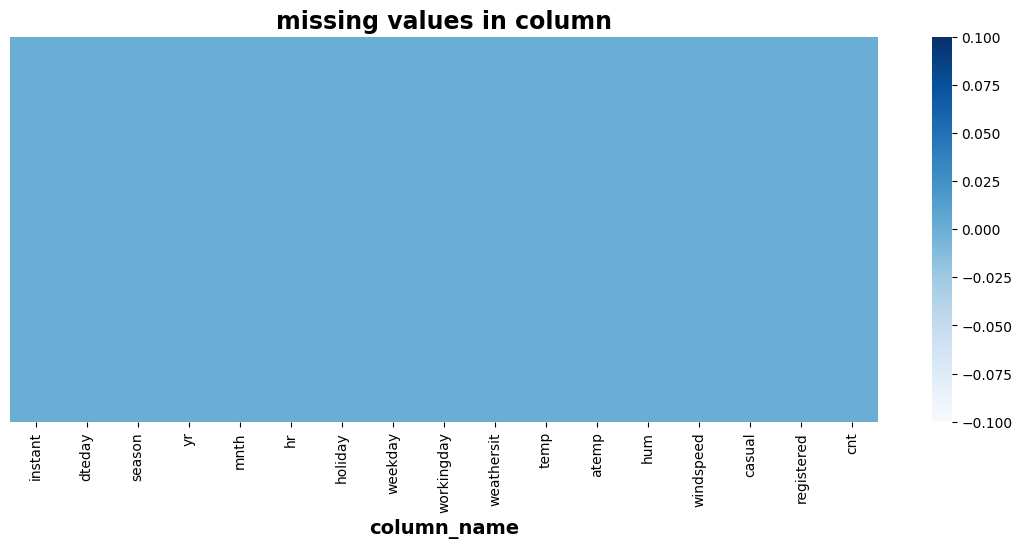

In [7]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False,cmap="Blues")
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

We don't have missing values in the dataset

In [8]:
# changing the type of the dteday column to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

In [9]:
print(f"Oldest date: {df['dteday'].min()}")
print(f"latest_date: {df['dteday'].max()}")

Oldest date: 2011-01-01 00:00:00
latest_date: 2012-12-31 00:00:00


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### Summary

The below table summarizes the column content for the data

| Column Name | Format | Range | Explanation |
|-|-|-|-|
| dteday | yyyy-mm-dd  | 2011-01-01 to<br>2012-12-31 | date |
| season | int64 | 1 to 4 | 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter |
| yr | int64 | 0 or 1 | year 0 = 2011, 1 = 2012 |
| mnth | int64 | 1 to 12 | month 1 to 12 |
| hr | int64 | 0 to 23 | hour 0 to 23 |
| holiday | int64 | 0 or 1 | 1 = Holiday, 0 = Not a Holiday |
| weekday | int64 | 0 or 6 | weekday : day of the week |
| workingday | int64 | 0 or 1 | 1 = Neither a weekend nor holiday, 0 = Either a weekend or a holiday |
| weathersit | int64 | 1 to 4 | 1 = Clear, Few clouds, Partly cloudy, Partly cloudy <br> 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br> 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  <br> 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp | float64 | 0.02 to 1.0 | Normalized temperature in Celsius. The values are divided to 41 (max) | 
| atemp | float64 | 0.0 to 1.0 | Normalized feeling temperature in Celsius. The values are divided to 50 (max) |
| hum | int64 | 0.0 to 1.0 | Normalized humidity. The values are divided to 100 (max) | 
| windspeed | float64 | 0.0 to 1.0 | Normalized wind speed. The values are divided to 67 (max) | 
| casual | int64 | 0 to 367 | Number of non-registered user rentals initiated | 
| registered | int64 | 0 to 886 | Number of registered user rentals initiated |
| cnt | int64 | 1 to 977 | Number of total rentals (casual + registered) |

### Questions for EDA

+ The target column (cnt) which refers to the number of bikes that have been rented at that hour, ranges between 1 and 977 over the 2 year span. 
+ Mean(count) = 190, with median and 75% quantile = 142 and 281, respectively. This suggests that the 'count' distribution is more denser at lower values. This is expected as out of 24 hours, we would expect the bike demand/usage to be high for maximum of maybe 6 hours or so. 
+ Would expect the strongest correlation from hours component in the datetime column
+ During weekdays most of the bikers would probably be the local commuters (more likely registered users) and during weekends and holidays, the majority of the bikers are more likely to be tourists (casual riders) 



## Data Distribution Visualization - Part 1

### Categorical Data Conversion

From the above set of 8 variables, we notice that the 5 of those columns ['season', 'holiday', 'weekday', 'workingday', 'weathersit'] should be category data types.  Converting these 5 features to categories

In [11]:
# Converting into categorical data
category_list = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
for var in category_list:
    df[var] = df[var].astype('category')

In [12]:
# Mapping numbers to understandable text
# Create a dictionary to map integer values to corresponding season names
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}

# Create a dictionary to map integer values to corresponding weather conditions
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}

# Create a dictionary to map integer values to corresponding weekday names
weekday_dict ={0:'Monday', 1:'Teusday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

# Use the .map() method to replace integer values 
df['season'] = df['season'].map(season_dict)
df['weathersit'] = df['weathersit'].map(weather_dict)
df['weekday'] = df['weekday'].map(weekday_dict)

# Randomly sample 5 rows from the DataFrame and display the result
df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12185,12186,2012-05-27,Summer,1,5,22,0,Monday,0,Light Snow/Rain,0.62,0.5758,0.83,0.0000,9,50,59
5045,5046,2011-08-03,Fall,0,8,3,0,Thursday,1,Misty+Cloudy,0.76,0.6970,0.55,0.0896,0,4,4
8368,8369,2011-12-20,Winter,0,12,8,0,Wednesday,1,Misty+Cloudy,0.42,0.4242,0.54,0.0896,10,422,432
14175,14176,2012-08-18,Fall,1,8,20,0,Sunday,0,Clear,0.70,0.6364,0.45,0.1045,99,242,341
8399,8400,2011-12-21,Spring,0,12,15,0,Thursday,1,Misty+Cloudy,0.48,0.4697,0.88,0.3881,4,57,61


In [13]:
# remaning the features to avoid confusion 
df = df.rename(columns={'weathersit':'weather', 'cnt':'count'})

### Distribution vs. Weather, Season, Working Day, week day
Let us see how 'count' = number of bikes rented varies across the various categorical data (weather, season, working day, weekday)

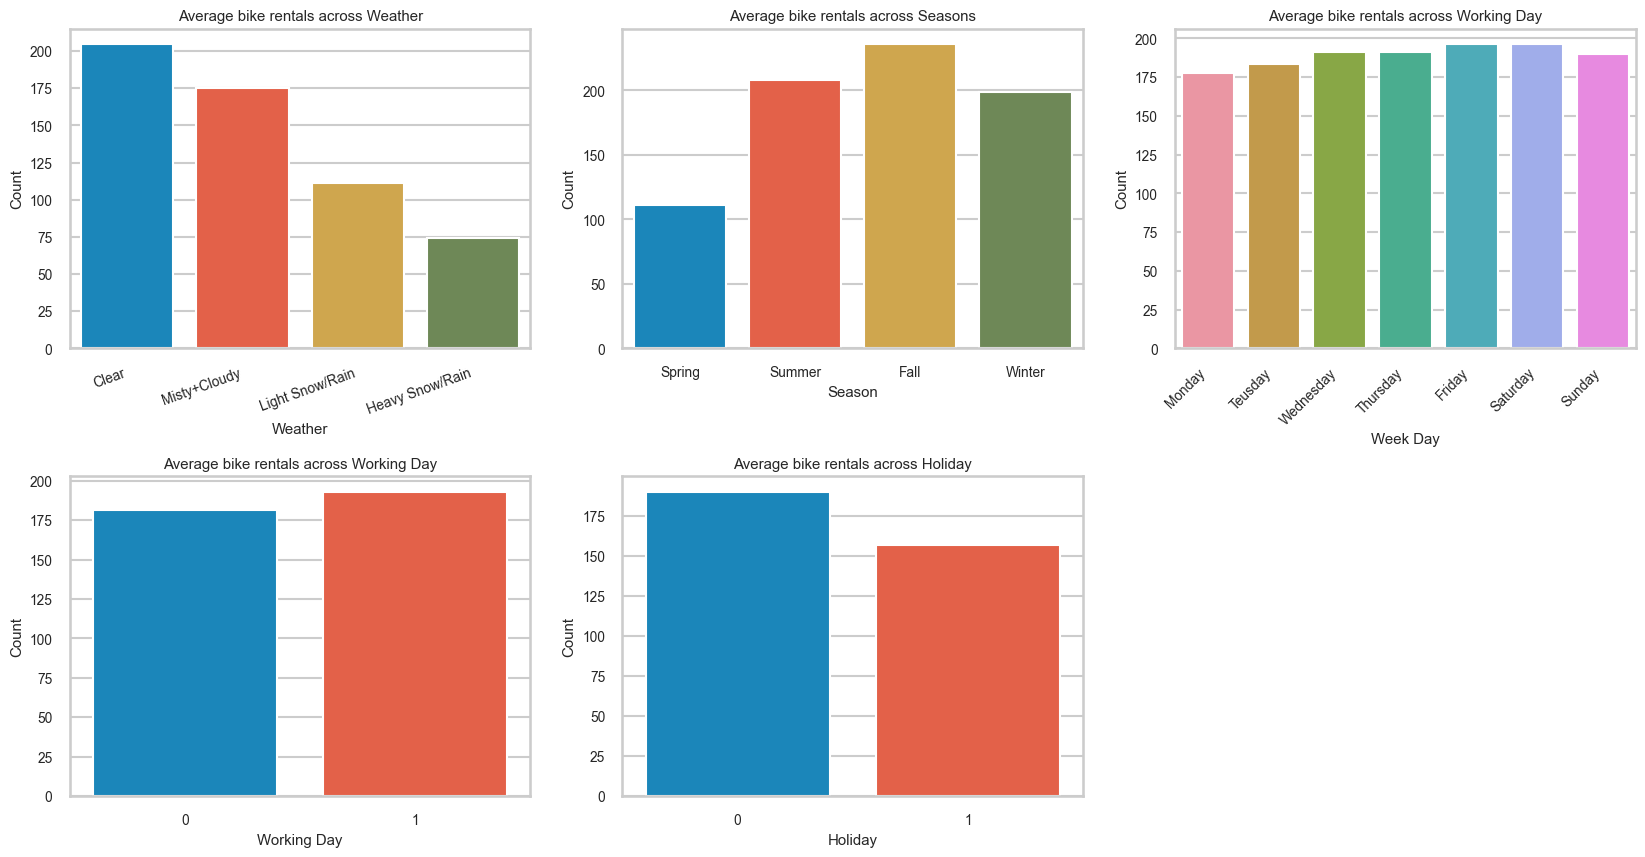

In [14]:
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.6)

fig = plt.figure(figsize=(18, 15))
axes = fig.add_subplot(3, 3, 1)
group_weather = pd.DataFrame(df.groupby(['weather'])['count'].mean()).reset_index()
sns.barplot(data=group_weather, x='weather', y='count', ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Average bike rentals across Weather')
axes.set_xticklabels(group_weather['weather'], rotation=20, ha='right')

axes = fig.add_subplot(3, 3, 2)
group_season = pd.DataFrame(df.groupby(['season'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='season', y='count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(3, 3, 3)
group_workingday = pd.DataFrame(df.groupby(['weekday'])['count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='weekday', y='count', ax=axes)
axes.set(xlabel='Week Day', ylabel='Count', title='Average bike rentals across Working Day')
axes.set_xticklabels(group_workingday['weekday'], rotation=45, ha='right')

axes = fig.add_subplot(3, 3, 4)
group_workingday = pd.DataFrame(df.groupby(['workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='count', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Average bike rentals across Working Day')

axes = fig.add_subplot(3, 3, 5)
group_season = pd.DataFrame(df.groupby(['holiday'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='holiday', y='count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')


plt.subplots_adjust(hspace=0.4)
plt.show()

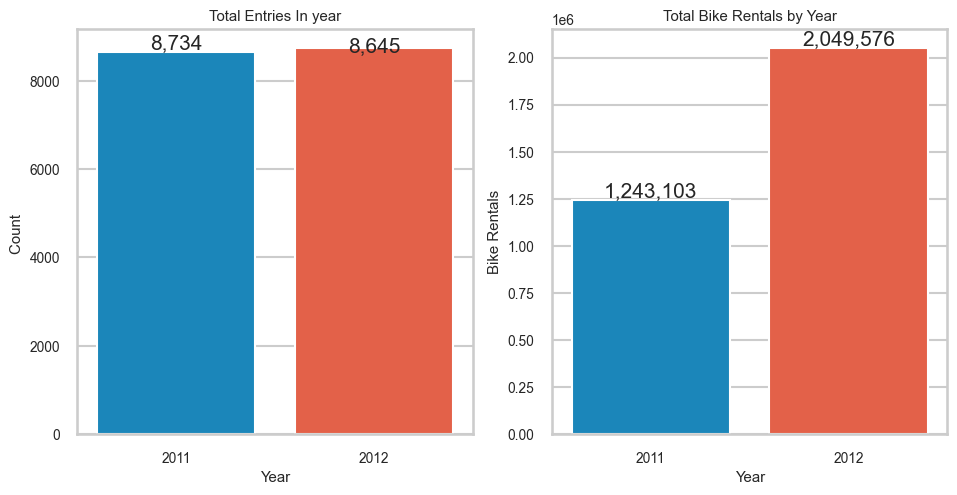

In [15]:
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(1, 2, 1)
entries = pd.DataFrame(df['dteday'].dt.year.value_counts()).reset_index()
sns.barplot(data=entries, x='index', y='dteday')
axes.set(xlabel='Year', ylabel='Count ', title='Total Entries In year')

for index, row in entries.iterrows():
    plt.text(x=row.name, y=row['dteday'], s="{:,.0f}".format(row['dteday']), ha='center', fontsize=15)

axes = fig.add_subplot(1, 2, 2)
yearly_totals = df.groupby(df['dteday'].dt.year)['count'].sum().reset_index()
sns.barplot(data=yearly_totals, x='dteday', y='count')

for index, row in yearly_totals.iterrows():
    plt.text(x=row.name, y=row['count']+17000, s="{:,.0f}".format(row['count']), ha='center', fontsize=15)
axes.set(xlabel='Year', ylabel='Bike Rentals', title='Total Bike Rentals by Year')

plt.show()

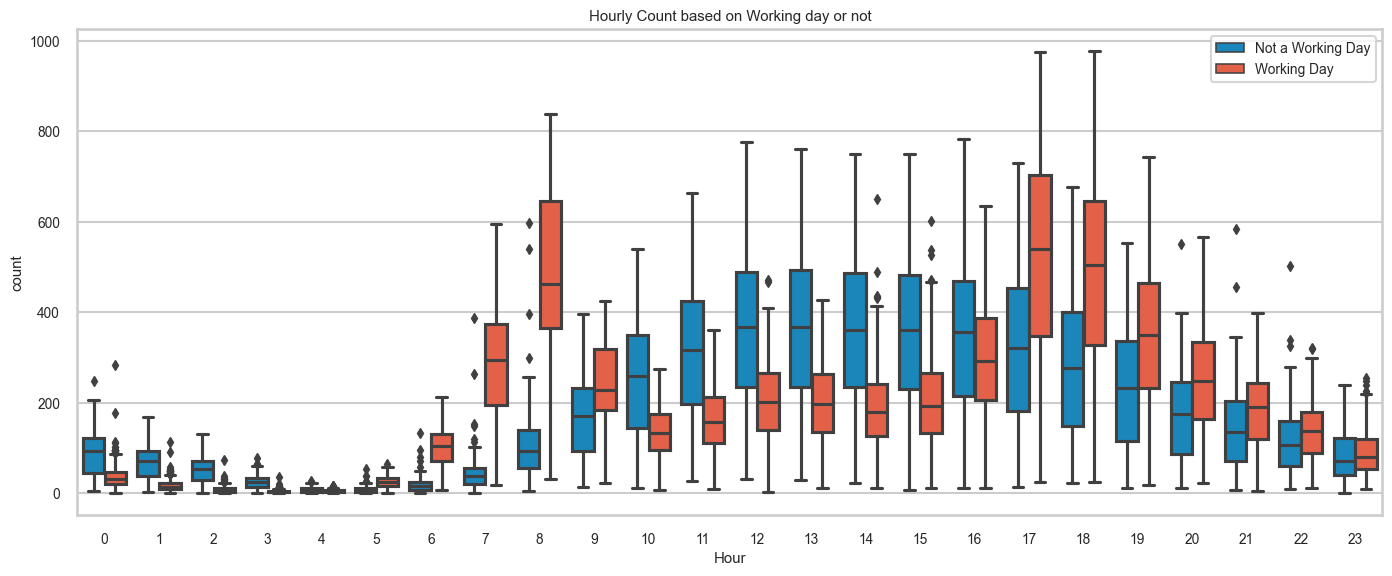

In [16]:
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=df, y='count', x='hr', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
axes.set(xlabel='Hour',title='Hourly Count based on Working day or not')

plt.show()

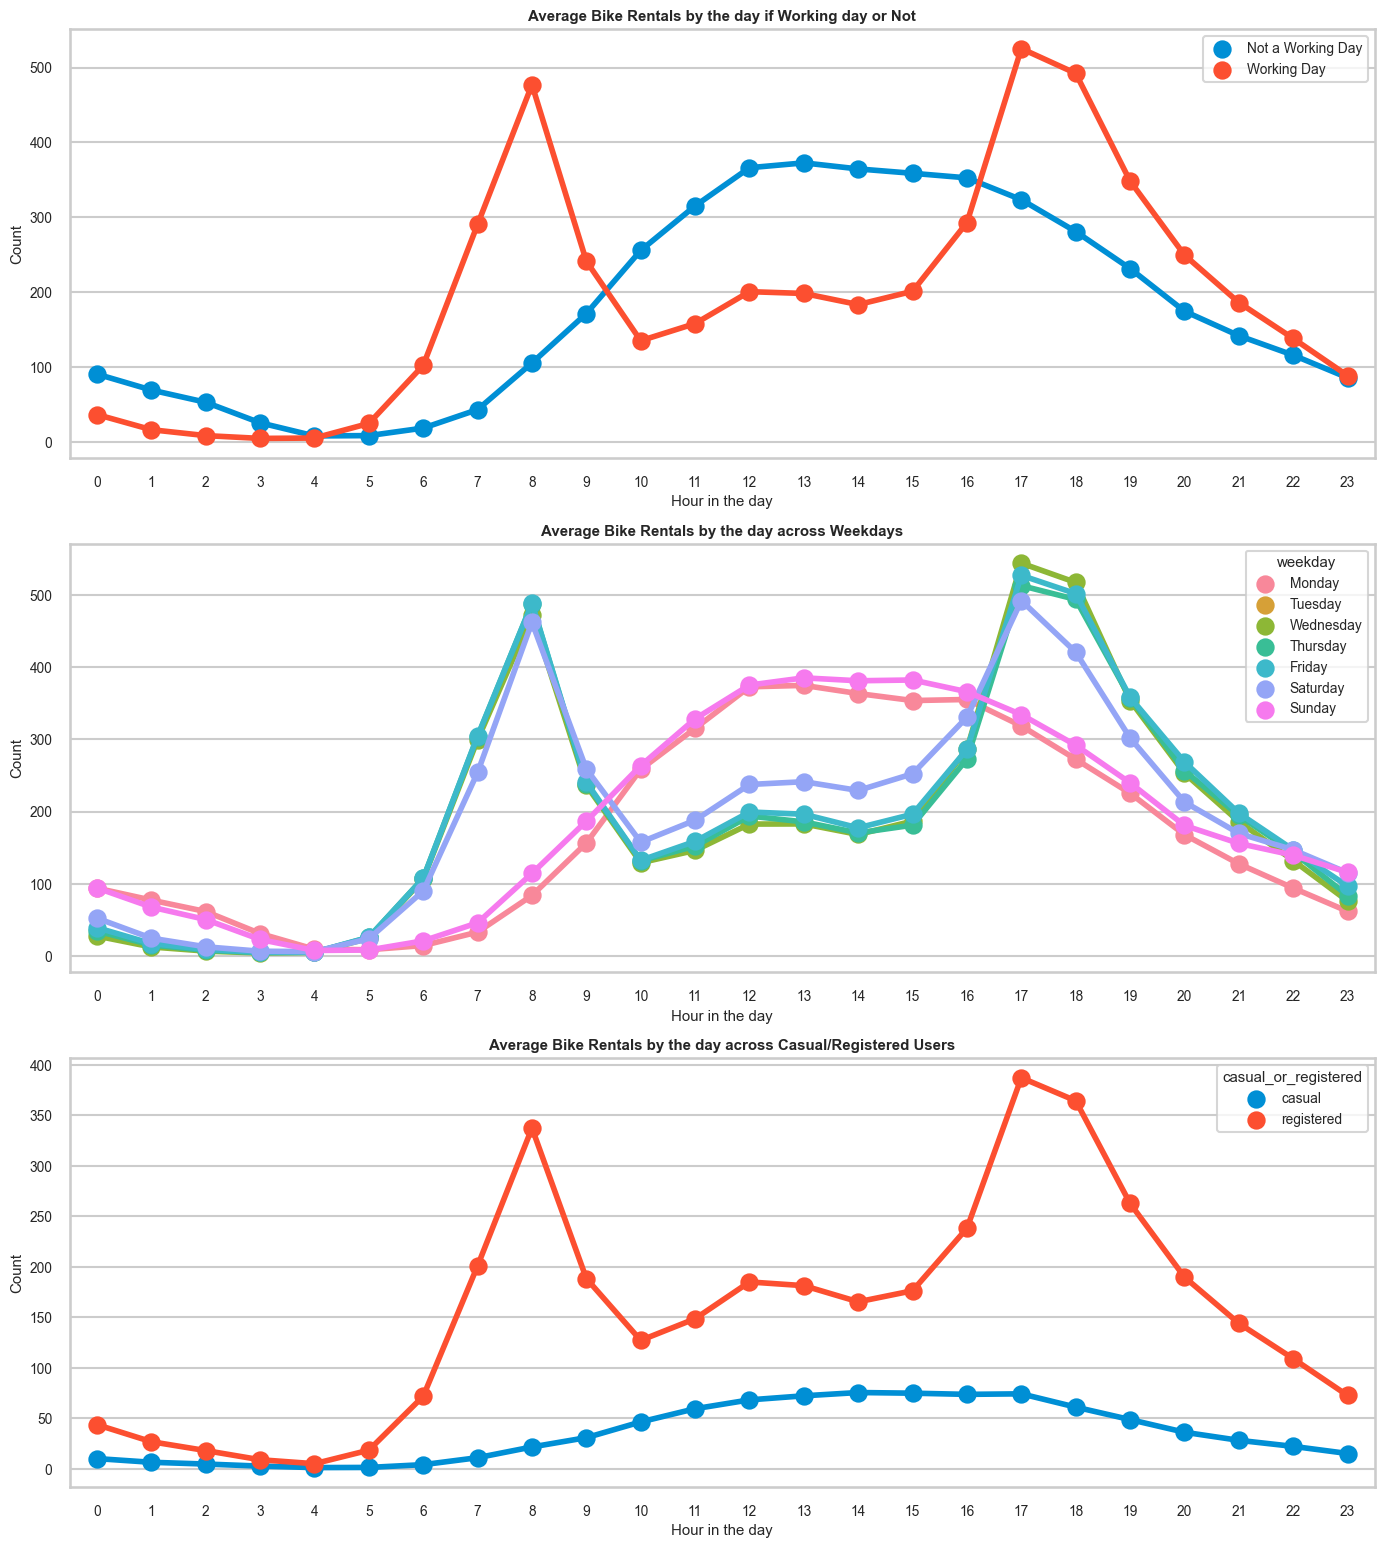

In [17]:
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(df.groupby(['workingday', 'hr'])['count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hr', y='count', hue='workingday', ax=axes[0])
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set_xlabel('Hour in the day')
axes[0].set_ylabel('Count')
axes[0].set_title('Average Bike Rentals by the day if Working day or Not', fontweight='bold')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(df.groupby(['weekday', 'hr'])['count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='hr', y='count', hue='weekday', ax=axes[1], hue_order=hue_order)
axes[1].set_xlabel('Hour in the day')
axes[1].set_ylabel('Count')
axes[1].set_title('Average Bike Rentals by the day across Weekdays', fontweight='bold')

df_melt = pd.melt(frame=df, id_vars='hr', value_vars=['casual', 'registered'], value_name='count', var_name='casual_or_registered')
group_casual_hour = pd.DataFrame(df_melt.groupby(['hr', 'casual_or_registered'])['count'].mean()).reset_index()
sns.pointplot(data=group_casual_hour, x='hr', y='count', hue='casual_or_registered', ax=axes[2])
axes[2].set_xlabel('Hour in the day')
axes[2].set_ylabel('Count')
axes[2].set_title('Average Bike Rentals by the day across Casual/Registered Users', fontweight='bold')

plt.show()


### Monthly Distribution

In [18]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,0,Sunday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,Sunday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,Sunday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


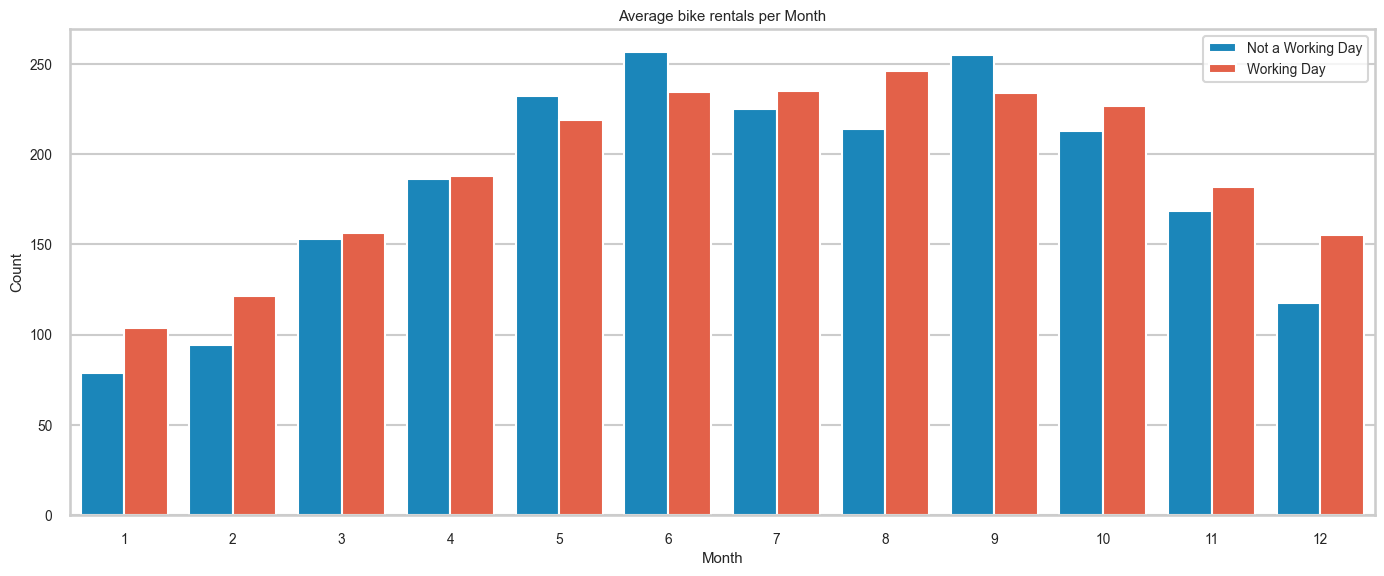

In [19]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(df.groupby(['mnth', 'workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_month, x='mnth', y='count', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

Using seaborn boxplots to get an idea of the distribution and outliers acorss various categorical features 

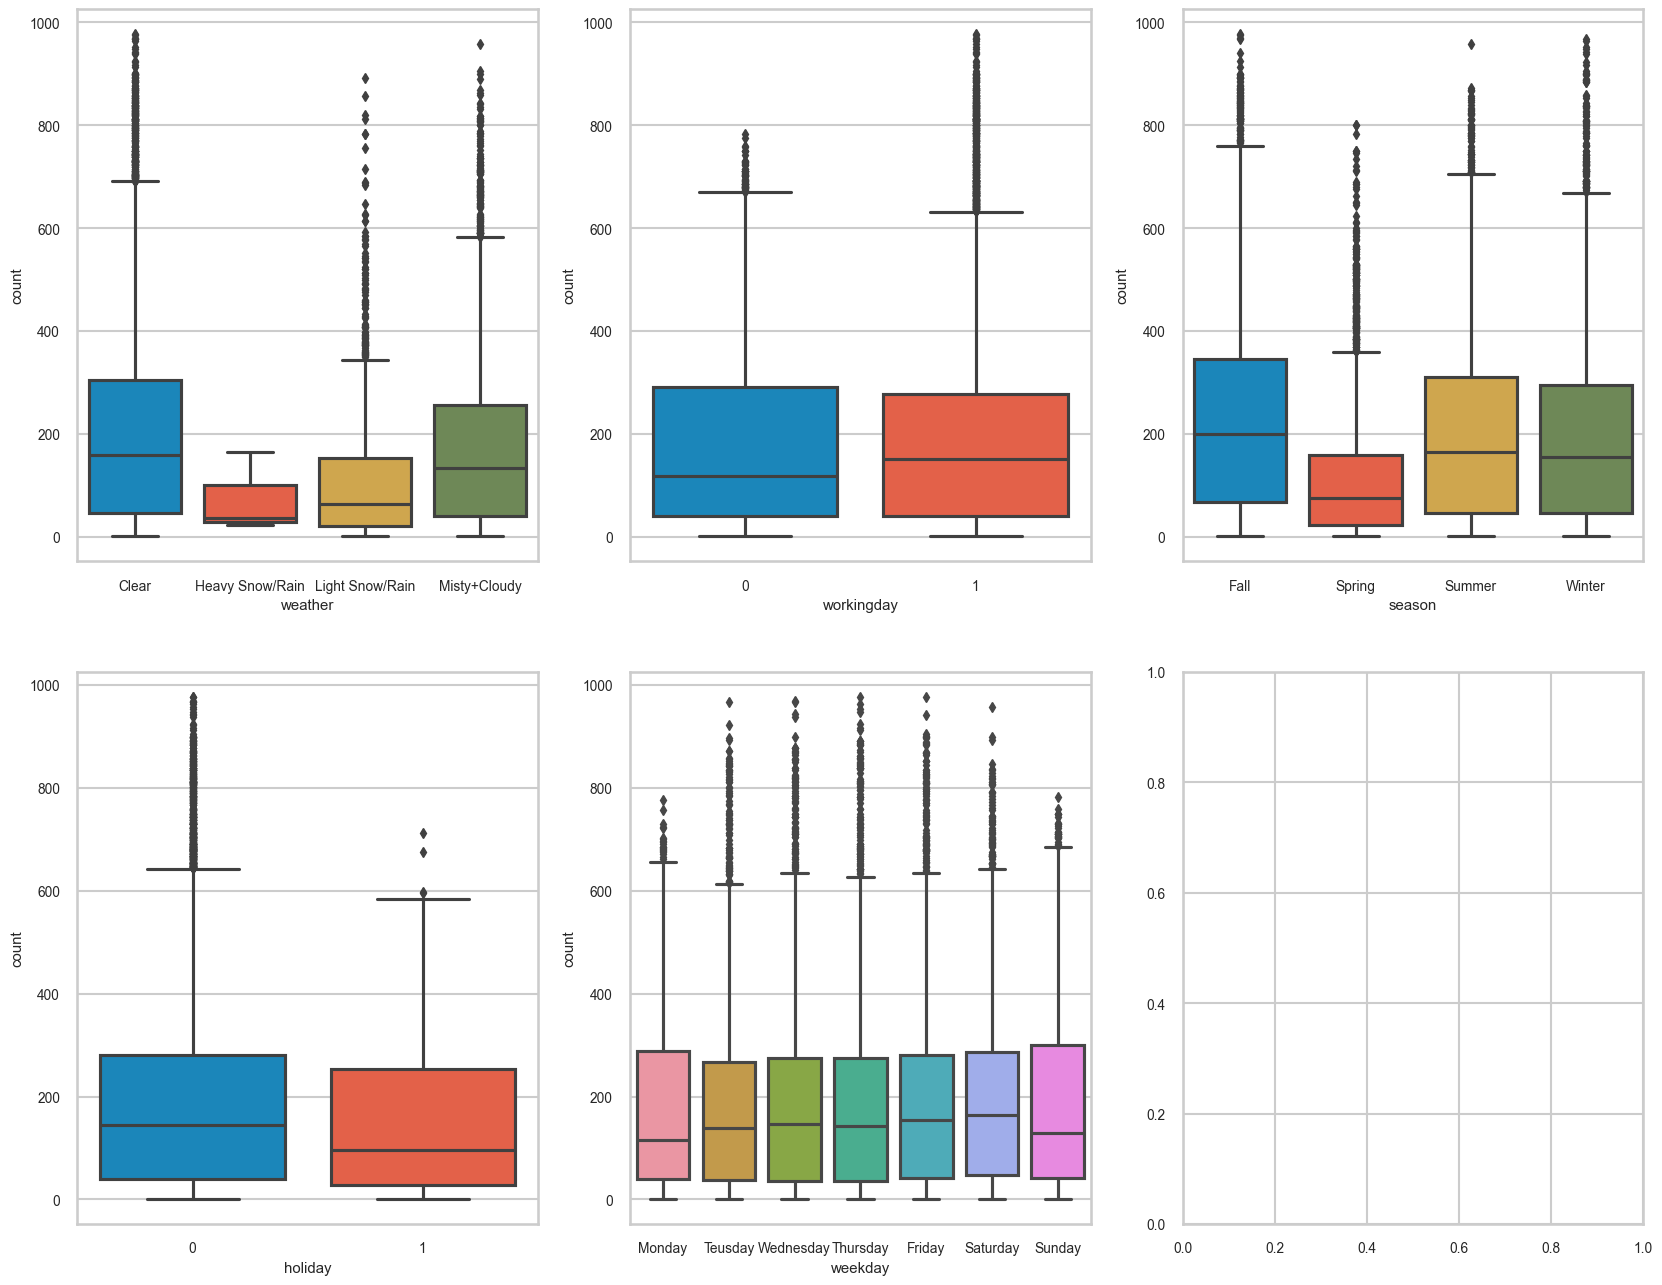

In [20]:
# Seaborn boxplots to get an idea of the distribution/outliers
f, axes = plt.subplots(2, 3, figsize=(18, 15))
hue_order= ['Clear', 'Heavy Snow/Rain', 'Light Snow/Rain', 'Misty+Cloudy']
sns.boxplot(data=df, y='count', x='weather', ax=axes[0][0], order=hue_order)
sns.boxplot(data=df, y='count', x='workingday', ax=axes[0][1])
hue_order= ['Fall', 'Spring', 'Summer', 'Winter']
sns.boxplot(data=df, y='count', x='season', ax=axes[0][2], order=hue_order)
sns.boxplot(data=df, y='count', x='holiday', ax=axes[1][0])
sns.boxplot(data=df, y='count', x='weekday', ax=axes[1][1])
plt.show()

**Few Observations**
+ Higher biker rentals as weather is more clear and sunny. 
+ Bike reservations are lesser in Spring season compared to Summer and Fall
+ Lots of outlier points for a particular seasons or weather conditions. This is most likely due to variable distribution across the day

### Removing Outliers

In [21]:
def remove_outlier_IQR(df):
    # Calculate the first quartile of the data
    Q1 = df.quantile(0.25)
    # Calculate the third quartile of the data
    Q3 = df.quantile(0.75)
    # Calculate the interquartile range
    IQR = Q3 - Q1
    # Create a new DataFrame that contains only rows where the values are not outliers
    df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]
    # Return the new DataFrame
    return df1

In [22]:
# Use the previously defined remove_outlier_IQR function to remove outliers from the 'Solar Radiation (MJ/m2)' column of the df DataFrame
df_outlier_removed_TM = remove_outlier_IQR(df["temp"])
# Use the previously defined remove_outlier_IQR function to remove outliers from the 'Wind speed (m/s)' column of the df DataFrame
df_outlier_removed_HM = remove_outlier_IQR(df["hum"])

# Convert the resulting Series to DataFrames
df_outlier_removed_TM = pd.DataFrame(df_outlier_removed_TM)
df_outlier_removed_HM = pd.DataFrame(df_outlier_removed_HM)

# Find the indices of rows in df that are not in df_outlier_removed_TM
ind_diff_SR = df.index.difference(df_outlier_removed_TM.index)
# Find the indices of rows in df that are not in df_outlier_removed_HM
ind_diff_WS = df.index.difference(df_outlier_removed_HM.index)

# Convert the indices to sets
in_first = set(ind_diff_SR)
in_second = set(ind_diff_WS)
# Find the union of the two sets of indices
result = in_second.union(in_first)

# Loop through the resulting set of indices
for i in range(0, len(result), 1):
    # Drop the row at the current index from the df DataFrame
    df.drop(i, inplace=True)

df.shape

(17357, 17)

In [23]:
# dropping instant column
df.drop('instant', axis=1, inplace=True)

## Correlation Analysis

### Regression Plots vs. Temperature, Humidity and Windspeed
Using seaborn to get regression plots with respect to Temperature, Humidity and Windspeed. 

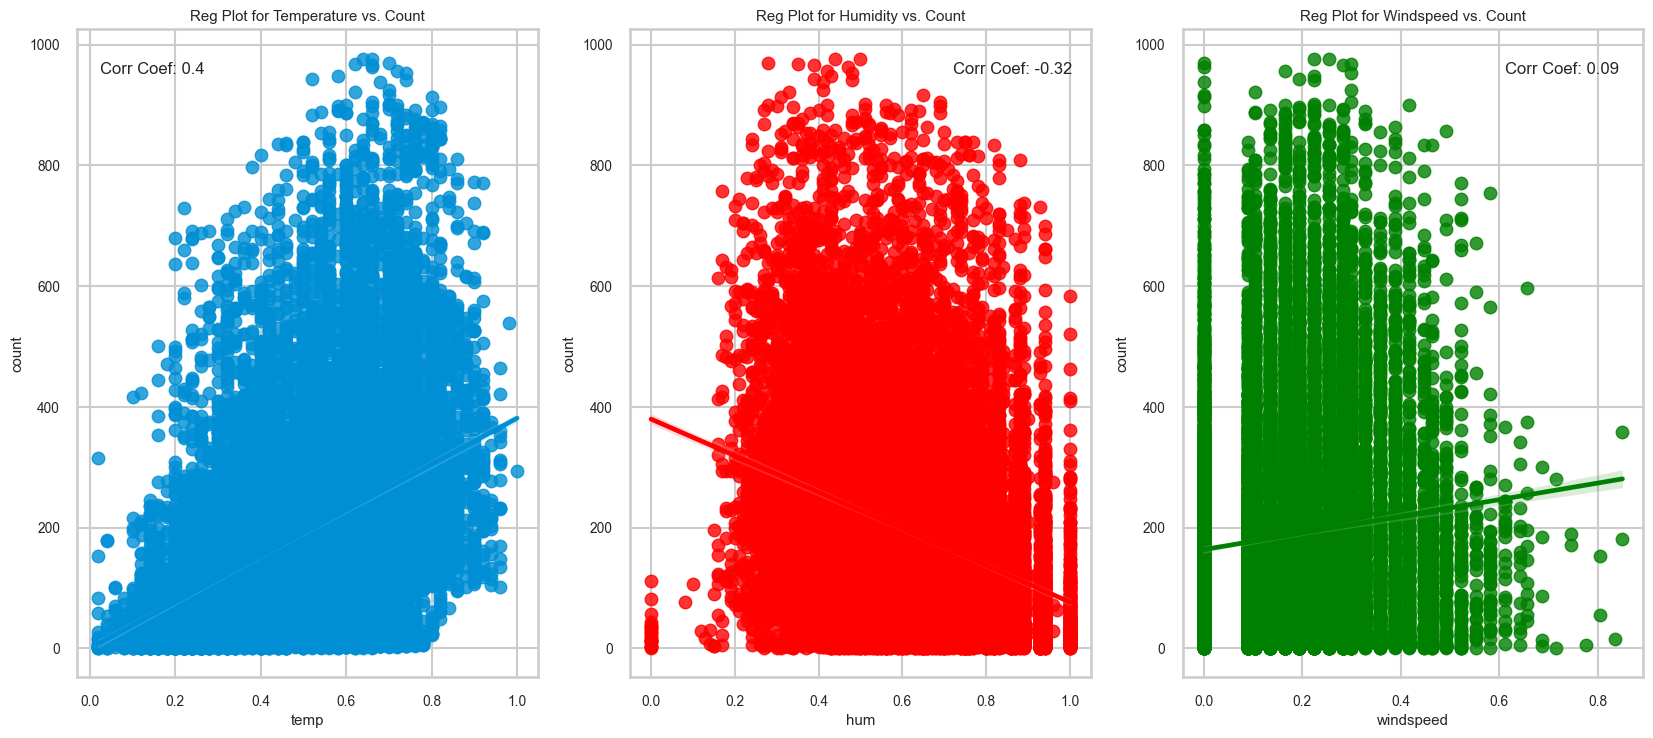

In [24]:
import numpy as np
from scipy.stats import pearsonr

fig = plt.figure(figsize=(18, 8))

# Plot for temperature vs. count
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=df, x='temp', y='count', ax=axes)
corr_coef, _ = pearsonr(df['temp'], df['count'])
corr_coef = np.round(corr_coef, decimals=2)
axes.text(0.05, 0.95, f'Corr Coef: {corr_coef}', transform=axes.transAxes, fontsize=12, verticalalignment='top')
axes.set(title='Reg Plot for Temperature vs. Count')

# Plot for humidity vs. count
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=df, x='hum', y='count', ax=axes, color='r')
corr_coef, _ = pearsonr(df['hum'], df['count'])
corr_coef = np.round(corr_coef, decimals=2)
axes.text(0.7, 0.95, f'Corr Coef: {corr_coef}', transform=axes.transAxes, fontsize=12, verticalalignment='top')
axes.set(title='Reg Plot for Humidity vs. Count')

# Plot for windspeed vs. count
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=df, x='windspeed', y='count', ax=axes, color='g')
corr_coef, _ = pearsonr(df['windspeed'], df['count'])
corr_coef = np.round(corr_coef, decimals=2)
axes.text(0.7, 0.95, f'Corr Coef: {corr_coef}', transform=axes.transAxes, fontsize=12, verticalalignment='top')
axes.set(title='Reg Plot for Windspeed vs. Count')

plt.show()

### Heatmap Plot
Using heatmap plots of all the numerical features to obtain correlation of the bike rental with other numerical features 

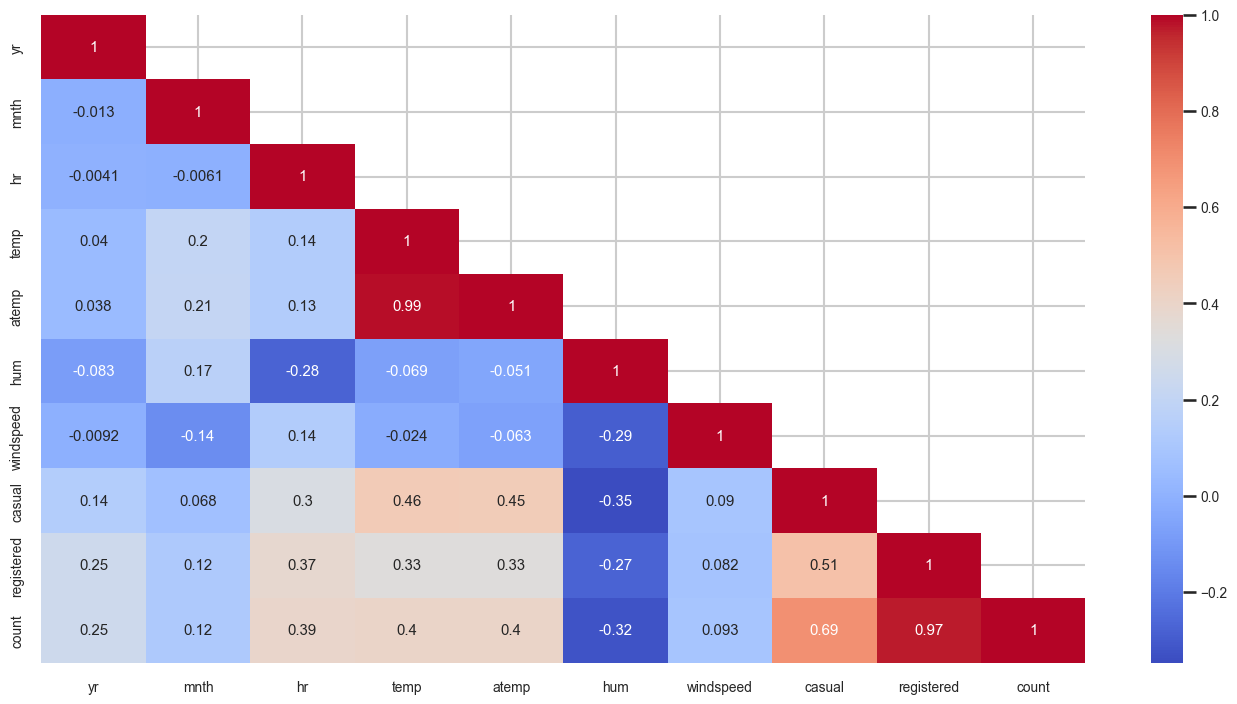

In [25]:
# Heatmap relative to all numeric columns
corr_matrix = df.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, cmap='coolwarm')
plt.show()

**Inferences from the above heatmap**
* temp and atemp are highly correlated as expected
* count is highly correlated with casual and registered as expected since count = casual + registered
* We see a negative correlation between count and humidity. The more the humidity, the less people prefer to bike
* Not a great amount of correlation between humidity and temperature, though
* Count has a weak dependence on windspeed

**Summary of the column transformations**
* Temp: temp and atemp are highly correlated. Hence retain only the temp column
* Windspeed: Very poorly correlated with count. Hence drop this column
* Casual and registered: These are individual components of our to be predicted column (count). Hence drop these columns

In [26]:
# Using numbers to represent categorical data to transform the categorical columns
season_inv_dict = {'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4}
weather_inv_dict = {'Clear':1, 'Misty+Cloudy':2, 'Light Snow/Rain':3, 'Heavy Snow/Rain':4}
day_inv_dict = {'Monday':0, 'Teusday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

df['season'] = df['season'].map(season_inv_dict)
df['weather'] = df['weather'].map(weather_inv_dict)
df['weekday'] = df['weekday'].map(day_inv_dict)


# Dropping columns from the provided data set that are either highly correlated with the existing columns: 
# or poorly correlated with the target column: windspeed and date
drop_columns_1 = ['atemp', 'windspeed', 'dteday','yr','weekday','casual','registered']
df = df.drop(drop_columns_1, axis=1)

df.sample(5)

,season,mnth,hr,holiday,workingday,weather,temp,hum,count
4719,3,7,13,0,1,1,0.84,0.56,120
16678,4,12,17,0,0,3,0.40,0.76,303
10431,1,3,18,0,1,1,0.66,0.44,746
14269,3,8,18,0,1,3,0.66,0.61,683
11259,2,4,8,0,1,2,0.42,0.82,677


# Creating a back up copy

In [27]:
df1 = df.copy()

# Encoding

In [28]:
# Create dummy variables for the 'month' column of the df DataFrame
season = pd.get_dummies(df['season'], prefix='season')

# Create dummy variables for the 'month' column of the df DataFrame
month = pd.get_dummies(df['mnth'], prefix='mnth')

# Create dummy variables for the 'weather' column of the df DataFrame
weather = pd.get_dummies(df['weather'], prefix='weather')

# Create dummy variables for the 'hour' column of the df DataFrame
hour = pd.get_dummies(df['hr'], prefix='hr')

# Concatenate the df DataFrame with the dummy variable DataFrames
df = pd.concat([df, season, weather, month, hour], axis=1)

# Display the columns of the mydata_train DataFrame
df.columns

Index(['season', 'mnth', 'hr', 'holiday', 'workingday', 'weather', 'temp',
       'hum', 'count', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [29]:
df1.head()

,season,mnth,hr,holiday,workingday,weather,temp,hum,count
22,1,1,22,0,0,2,0.40,0.94,28
23,1,1,23,0,0,2,0.46,0.88,39
24,1,1,0,0,0,2,0.46,0.88,17
25,1,1,1,0,0,2,0.44,0.94,17
26,1,1,2,0,0,2,0.42,1.00,9


## ***Train and Test Split***

In [30]:
x = df.drop('count', axis=1)
y=df['count']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (13885, 52)
X_test shape: (3472, 52)


### Data Transformation

In [32]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# the below code is old one 
# donot run this code
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1 , max_iter= 3000),
    "Ridge": Ridge(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "lgbr":lgb.LGBMRegressor(),
 }

In [35]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1 , max_iter= 3000),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "lgbr":lgb.LGBMRegressor(),
 }

In [36]:
def evaluate_reg(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: mean_squared_error, root_mean_squared_error, r2_score, 
    '''
    mean_squared_error = mean_squared_error(true, predicted) # Calculate mean_squared_error
    root_mean_squared_error = math.sqrt(mean_squared_error(true, predicted)) # root_mean_squared_error 
    r2_score = r2_score(true, predicted) # Calculate r2_score
    return mean_squared_error, root_mean_squared_error , r2_score

In [37]:
import math
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_reg(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: mean_squared_error, root_mean_squared_error, r2_score, 
    '''
    mse = mean_squared_error(true, predicted) # Calculate mean_squared_error
    rmse = math.sqrt(mse) # root_mean_squared_error 
    r2 = r2_score(true, predicted) # Calculate r2_score
    return mse, rmse, r2


In [38]:
# # Create a function which can evaluate models and return a report 
# def evaluate_models(X, y, models):
#     '''
#     This function takes in X and y and models dictionary as input
#     It splits the data into Train Test split
#     Iterates through the given model dictionary and evaluates the metrics
#     Returns: Dataframe which contains report of all models metrics with cost
#     '''
#     # separate dataset into train and test
#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
#     MSE=[]
#     RMSE=[]
#     R2=[]
#     models_list = []
    
#     for i in range(len(list(models))):
#         model = list(models.values())[i]
#         model.fit(X_train, y_train) # Train model

#         # Make predictions
#         y_train_pred = model.predict(X_train)
#         y_test_pred = model.predict(X_test)

#         # Training set performance
#         model_train_mean_squared_error, model_train_root_mean_squared_error , model_train_r2_score = evaluate_reg(y_train ,y_train_pred)

#         # Test set performance
#         model_test_mean_squared_error, model_test_root_mean_squared_error , model_test_r2_score = evaluate_reg(y_test, y_test_pred)

#         print(list(models.keys())[i])
#         models_list.append(list(models.keys())[i])

#         print('Model performance for Training set')
#         print("- mean_squared_error: {:.4f}".format(model_train_mean_squared_error))
#         print('- root_mean_squared_error: {:.4f}'.format(model_train_root_mean_squared_error)) 
#         print('- r2_score: {:.4f}'.format(model_train_r2_score))
       

#         print('----------------------------------')

#         print('Model performance for Test set')
#         print("- mean_squared_error: {:.4f}".format(model_test_mean_squared_error))
#         print('- root_mean_squared_error: {:.4f}'.format(model_test_root_mean_squared_error)) 
#         print('- r2_score: {:.4f}'.format(model_test_r2_score))
#         print('='*35)
#         print('\n')
        
#     report=pd.DataFrame(list(zip(models_list)), columns=['Model Name'])
        
#     return report

In [39]:
# evaluate_models(x, y, models)

In [40]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=5)
gridSearch_decisionTree.fit(X_train,y_train)

decisionTree.fit(X_train,y_train)
best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,y_test)

In [41]:
y_pred_DT = gridSearch_decisionTree.predict(X_test)

In [42]:
# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.6978805978281899 with max depth 7


The best R2 test score is : 0.6987404768452423 with max depth = 7


In [43]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

r2_score(y_test, y_test_pred_xgb)

0.8553817444847397

In [44]:
import lightgbm as lgb
lgbr=lgb.LGBMRegressor()

lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

lgbr_grid.fit(X_train,y_train)

y_train_pred_lgbr = lgbr_grid.predict(X_train)
y_test_pred_lgbr = lgbr_grid.predict(X_test)

r2_score(y_test, y_test_pred_lgbr)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.8624490378198774

In [64]:
import lightgbm as lgb
lgbr=lgb.LGBMRegressor()

lgbr_para={'n_estimators': [100],'boosting_type': ['gbdt'], 'learning_rate':[0.1, 0.2], 'min_child_samples':[20, 40, 60], 'num_leaves':[20, 30, 50],\
           'random_state':[6368], 'subsample_for_bin':[200000]	}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

lgbr_grid.fit(X_train,y_train)

y_train_pred_lgbr = lgbr_grid.predict(X_train)
y_test_pred_lgbr = lgbr_grid.predict(X_test)

r2_score(y_test, y_test_pred_lgbr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


0.8626273124359249

In [69]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from tqdm import tqdm

# Load the Boston Housing dataset
# boston = load_boston()
# X, y = boston.data, boston.target

# Define the LightGBM model to be optimized
lgbm = lgb.LGBMRegressor()

# Define the hyperparameter space to search over
param_dist = {'n_estimators': sp_randint(50, 500),
              'learning_rate': sp_uniform(0.01, 0.5),
              'num_leaves': sp_randint(10, 100),
              'subsample': sp_uniform(0.1, 1),
              'colsample_bytree': sp_uniform(0.1, 1),
              'reg_alpha': sp_uniform(0, 10),
              'reg_lambda': sp_uniform(0, 10)}

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist, 
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                   random_state=42)


# Fit the RandomizedSearchCV object to the data
for i in tqdm(range(100)):
    random_search.fit(X_train, y_train)
# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X_train, y_train)

# Print the best parameters and lowest MSE score
print("Best parameters found: ", random_search.best_params_)
print("Lowest MSE found: ", np.abs(random_search.best_score_))

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print("Test MSE: ", mse)
print("r2_score : ",r2_score)


 57%|█████▋    | 57/100 [5:32:21<4:10:43, 349.86s/it]  


KeyboardInterrupt: 

In [68]:
%pip install tqdm


     -------------------------------------- 77.1/77.1 kB 857.1 kB/s eta 0:00:00
